In [1]:
%matplotlib notebook
# Use matplotlib notebook for its added features of coordinate display and zoom
from plantcv import plantcv as pcv
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Source Image: z1500

<IPython.core.display.Javascript object>


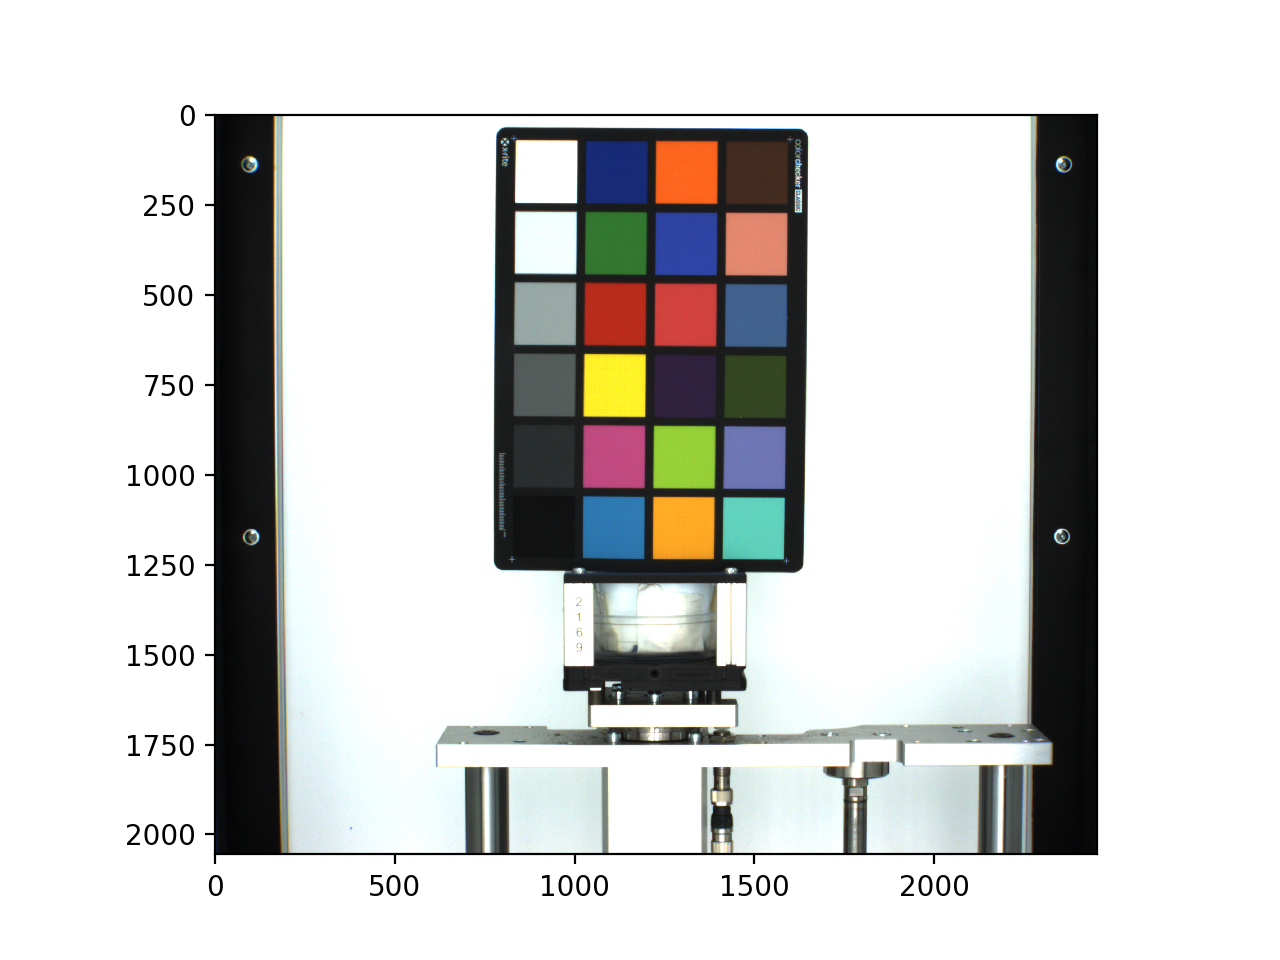

In [2]:
#read in img
img, img_path, img_filename = pcv.readimage(filename="TM009_B_092115_VIS_SV_0_z1500_h2_g0_e100_258104_0.png", 
                                            debug="plot")

In [36]:
dimensions = [100, 100]
start = (870, 100)
x_dist = 190
y_dist = 200
rows = 6
cols = 4

In [46]:
chips = []
for i in range(0, rows):
    y = start[1] + i * y_dist
    for j in range(0, cols):
        x = start[0] + j * x_dist
        chips.append(pcv.roi.rectangle(img=img, x=x, y=y, w=dimensions[0], h=dimensions[1]))

<IPython.core.display.Javascript object>


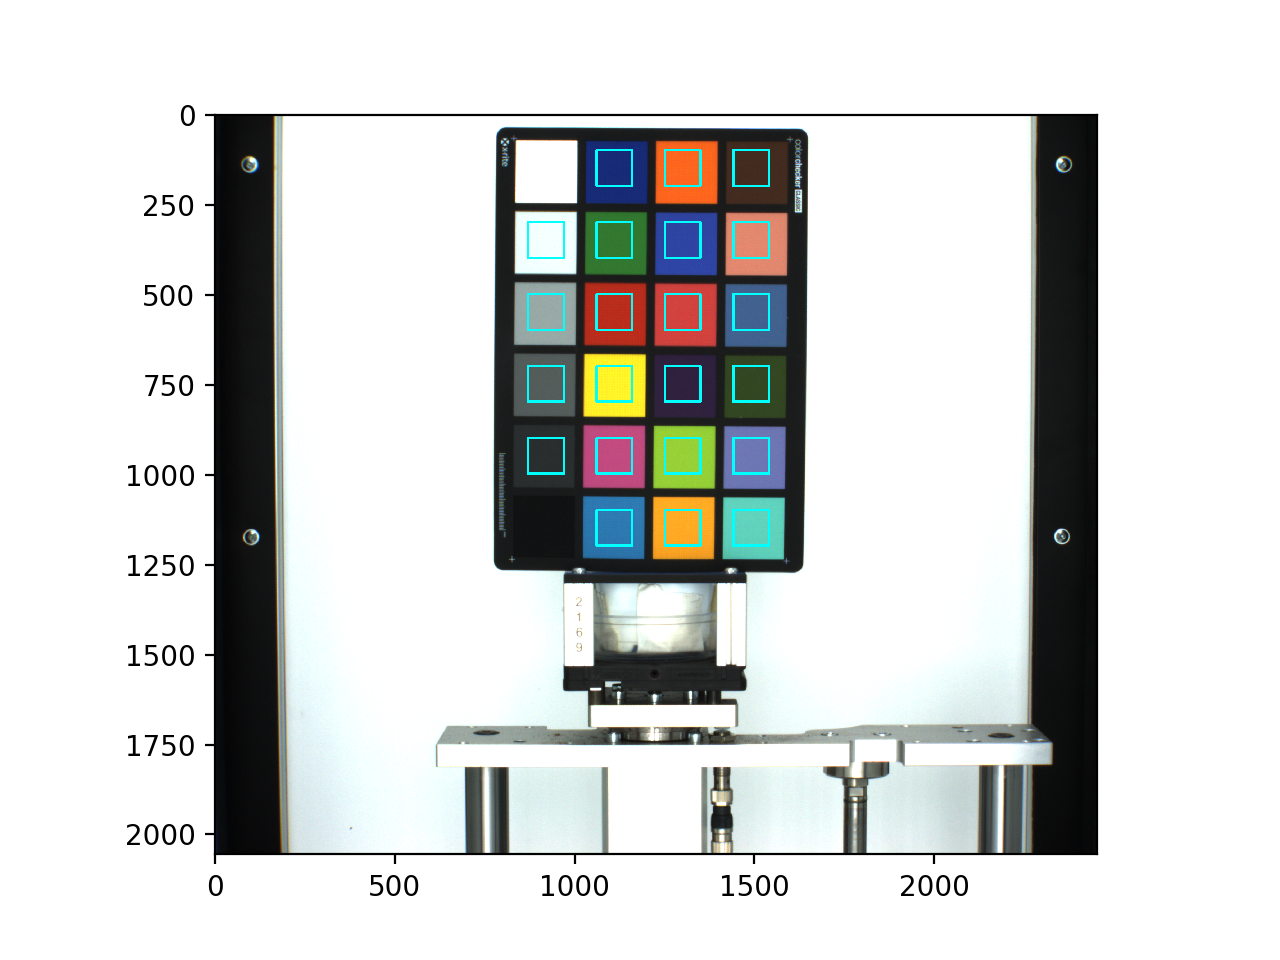

In [47]:
canvas = np.copy(img)
del chips[20] # Remove black
del chips[0] # Remove white
for chip in chips:
    cv2.drawContours(canvas, chip[0], -1, (255, 255, 0), 5)
pcv.plot_image(canvas)

<IPython.core.display.Javascript object>


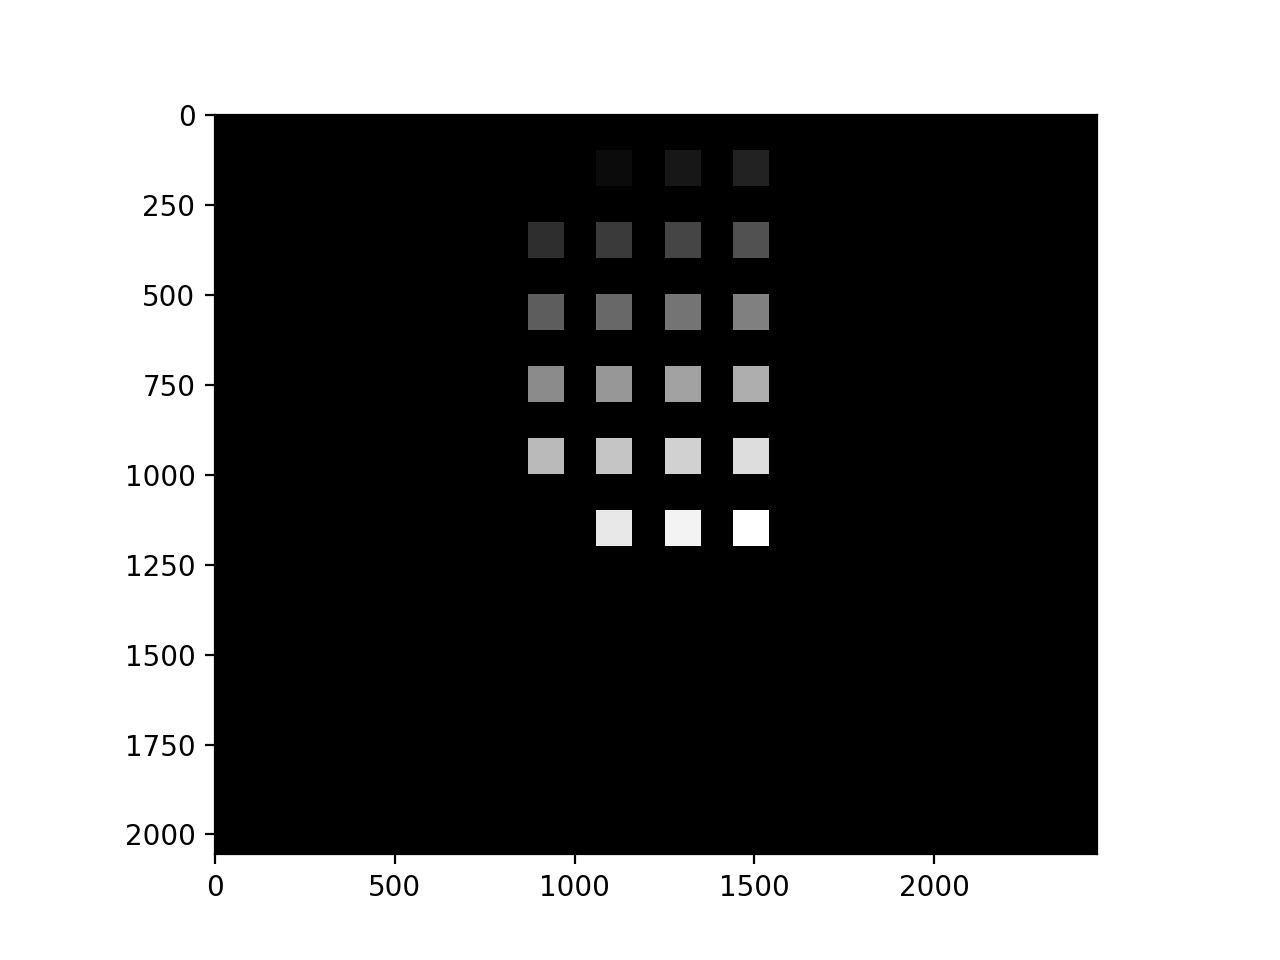

In [48]:
# Create empty mask img
mask = np.zeros(shape=np.shape(img)[:2], dtype = np.uint8())
i = 1
for chip in chips:
    mask = cv2.drawContours(mask, chip[0], -1, (i*10), -1)
    i += 1
pcv.plot_image(mask, cmap="gray")

In [49]:
np.unique(mask)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220], dtype=uint8)

In [50]:
# Write to file
pcv.print_image(img=mask, filename="color_card_mask_z1500.png")